In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.1 MB/s eta 0:00:00


In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [7]:
# import functions from modsim

from modsim import *
import numpy as np

In [9]:
def generate_arrival_probability(hour):
    """Generate a probability of a student arriving based on the hour of the day."""
    if 8 <= hour < 10 or 12 <= hour < 14 or 17 <= hour < 19:
        return 0.7  # Higher probability during peak hours
    else:
        return 0.3  # Lower probability during non-peak hours

In [10]:
def step(system, hour):
    """Simulate a time step, considering varying arrival probabilities."""
    bike_breaks(system)
    repair_bikes(system)

    arrival_prob = generate_arrival_probability(hour)

    if flip(arrival_prob):
        check_out_bike(system)

    if flip(0.33):
        bike_to_olin(system)

In [11]:
def run_simulation(num_steps):
    """Run the bike share simulation for a given number of time steps."""
    system = State(olin=10, wellesley=2, olin_broken=0, wellesley_empty=0)
    results = TimeSeries()

    for i in range(num_steps):
        hour = i // 60  # Assuming each step represents one minute
        step(system, hour)
        results[i+1] = system.olin

    return results

# Run the simulation for 240 time steps (4 hours)
results = run_simulation(240)

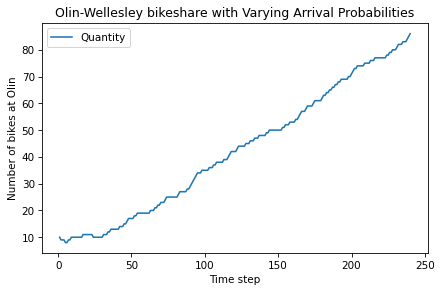

In [12]:
# Plot the results
results.plot()

# Decorate the plot
decorate(title='Olin-Wellesley bikeshare with Varying Arrival Probabilities',
         xlabel='Time step',
         ylabel='Number of bikes at Olin')